In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

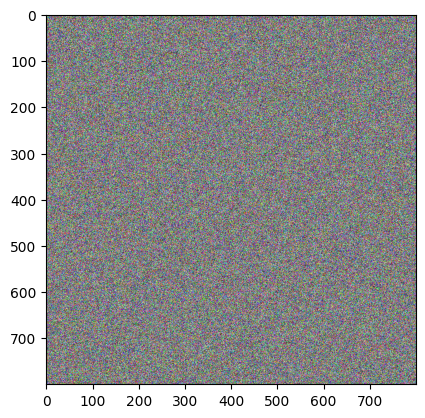

In [23]:
# 1. Tạo một ma trận điểm ảnh với kích thước 800x800 và mỗi điểm ảnh có giá trị được sinh ngẫu nhiên từ 0 đến 255. Hiển thị bức ảnh này.
img = np.random.randint(0, 256, (800,800,3), dtype='uint8')
cv.imshow('Image', img)

cv.waitKey(0)

plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.axis = 'off'
plt.show()

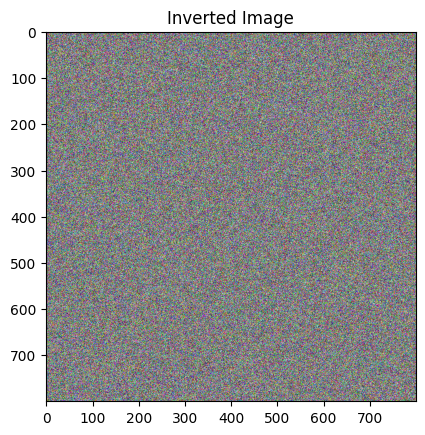

In [24]:
# 2. 
inverted_img = 255 - img
cv.imshow('Inverted Image', inverted_img)

cv.waitKey(0)
cv.destroyAllWindows()

plt.imshow(cv.cvtColor(inverted_img, cv.COLOR_BGR2RGB))
plt.axis = 'off'
plt.title('Inverted Image')
plt.show()

In [ ]:
# 3.
image = np.random.randint(0, 256, (300, 300), dtype=np.uint8)
image_float = image.astype(np.float32)

# Danh sách các giá trị alpha
alpha_values = [-100, -50, 50, 100]
brightened_images = []

# Thực hiện điều chỉnh sáng cho từng giá trị alpha
for alpha in alpha_values:
    brightened_image = image_float + alpha
    brightened_image = np.clip(brightened_image, 0, 255)
    brightened_images.append(brightened_image.astype(np.uint8))

# Nếu cần, thay đổi kích thước các ảnh đã chỉnh sáng về kích thước của ảnh gốc
brightened_images_resized = [cv.resize(img, (img.shape[1], img.shape[0])) for img in brightened_images]

# Ghép các bức ảnh lại thành một hình ảnh duy nhất
# Sử dụng np.hstack để ghép theo chiều ngang
combined_image = np.hstack([image] + brightened_images_resized)

cv.imshow('Combined Image', combined_image)
cv.waitKey(0)
cv.destroyAllWindows()

plt.figure(figsize=(15, 10))
plt.subplot(151);plt.imshow(image, cmap="gray");plt.title("Original Image")
plt.subplot(152);plt.imshow(brightened_images[0], cmap="gray");plt.title("alpha_values -100")
plt.subplot(153);plt.imshow(brightened_images[1], cmap="gray");plt.title("alpha_values -50")
plt.subplot(154);plt.imshow(brightened_images[2], cmap="gray");plt.title("alpha_values 50")
plt.subplot(155);plt.imshow(brightened_images[3], cmap="gray");plt.title("alpha_values 100")
plt.show()

In [ ]:
# 4.
# Danh sách các giá trị beta
beta_values = [0.7, 1.3]

# Tạo danh sách để lưu trữ các ảnh đã chỉnh sáng
brightened_images = []

# Thực hiện điều chỉnh sáng cho từng giá trị beta
for beta in beta_values:
    # Áp dụng hàm điều chỉnh sáng
    brightened_image = image_float * beta
    
    # Cắt giá trị điểm ảnh để đảm bảo nằm trong khoảng [0, 255]
    brightened_image = np.clip(brightened_image, 0, 255)
    
    # Chuyển đổi lại về định dạng uint8
    brightened_images.append(brightened_image.astype(np.uint8))

# Đảm bảo tất cả các ảnh đều có cùng kích thước
# Nếu cần, thay đổi kích thước các ảnh đã chỉnh sáng về kích thước của ảnh gốc
brightened_images_resized = [cv.resize(image, (image.shape[1], image.shape[0])) for image in brightened_images]

# Ghép các bức ảnh lại thành một hình ảnh duy nhất
# Sử dụng np.hstack để ghép theo chiều ngang
combined_image = np.hstack([image] + brightened_images_resized)

cv.imshow('Combined Image', combined_image)
cv.waitKey(0)
cv.destroyAllWindows()

plt.figure(figsize=(15, 10))
plt.subplot(151);plt.imshow(image, cmap="gray");plt.title("Original Image")
plt.subplot(152);plt.imshow(brightened_images[0], cmap="gray");plt.title("beta_values 0.7")
plt.subplot(153);plt.imshow(brightened_images[1], cmap="gray");plt.title("beta_values 1.3")
plt.show()

In [ ]:
# 5.
blank = np.random.randint(0, 256, (800, 800), dtype=np.uint8)

# Chia ảnh thành 4 phần 400x400
B = blank[0:400, 0:400]  # Phần 1
G = blank[0:400, 400:800]  # Phần 2
R = blank[400:800, 0:400] # Phần 3
#blank[400:800, 400:800] # Phần 4

RGB = cv.merge((R,G,B))

# cv.imshow('RGB Image', RGB[:, :, ::-1])
# cv.waitKey(0)
# cv.destroyAllWindows()

plt.imshow(RGB,cmap='gray')

In [ ]:
# 6.
inverted_rgb_image = 255 - RGB

def Adjusted_linear(image, a):
    return np.clip(image.astype(np.int32) + a, 0, 255).astype(np.uint8)

def Adjusted_scale(image, b):
    return np.clip(image.astype(np.float32) * b, 0, 255).astype(np.uint8)

plt.figure(figsize= (12, 12))

plt.subplot(3, 3, 1)
plt.imshow(RGB)
plt.title('RGB Image')

plt.subplot(3, 3, 2)
plt.imshow(inverted_rgb_image)
plt.title('Inverted RGB Image')

#Adjusted_linear
test_value_linear = [-100, -50, 0, 50, 100]
for i, a in enumerate(test_value_linear):
    adjusted_linear_image = Adjusted_linear(RGB, a)
    plt.subplot(3, 3, i + 3)
    plt.imshow(adjusted_linear_image)
    plt.title(f"Brightness Image: {a}")

#Adjusted_scale
test_value_scale = [0.7, 1.3]
for i, b in enumerate(test_value_scale):
    adjusted_scale_image = Adjusted_scale(RGB, b)
    plt.subplot(3, 3, i + 8)
    plt.imshow(adjusted_scale_image)
    plt.title(f"Brightness Image: {b}")

plt.tight_layout()
plt.show()

In [ ]:
# 7.
blank = np.random.randint(0, 256, (800, 800), dtype=np.uint8)

# Chia ảnh thành 4 phần 400x400
H = blank[0:400, 0:400]  # Phần 1
S = blank[0:400, 400:800]  # Phần 2
V = blank[400:800, 0:400] # Phần 3
#blank[400:800, 400:800] # Phần 4

RGB = cv.merge((H,S,V))
HSV_img = cv.cvtColor(RGB, cv.COLOR_HSV2BGR)

plt.figure(figsize=[20,5])
# plt.subplot(141);plt.imshow(H, cmap="gray");plt.title("H Channel")
# plt.subplot(142);plt.imshow(S, cmap="gray");plt.title("S Channel")
# plt.subplot(143);plt.imshow(V, cmap="gray");plt.title("V Channel")
plt.subplot(144);plt.imshow(HSV_img);   plt.title("HSV")

In [ ]:
# 8.
inverted_hsv_image = 255 - HSV_img

def Adjusted_linear(image, a):
    return np.clip(image.astype(np.int32) + a, 0, 255).astype(np.uint8)

def Adjusted_scale(image, b):
    return np.clip(image.astype(np.float32) * b, 0, 255).astype(np.uint8)

plt.figure(figsize= (12, 12))

plt.subplot(3, 3, 1)
plt.imshow(HSV_img)
plt.title('HSV Image')

plt.subplot(3, 3, 2)
plt.imshow(inverted_hsv_image)
plt.title('Inverted HSV Image')

#Adjusted_linear
test_value_linear = [-100, -50, 0, 50, 100]
for i, a in enumerate(test_value_linear):
    adjusted_linear_image = Adjusted_linear(HSV_img, a)
    plt.subplot(3, 3, i + 3)
    plt.imshow(adjusted_linear_image)
    plt.title(f"Brightness Image: {a}")

#Adjusted_scale
test_value_scale = [0.7, 1.3]
for i, b in enumerate(test_value_scale):
    adjusted_scale_image = Adjusted_scale(HSV_img, b)
    plt.subplot(3, 3, i + 8)
    plt.imshow(adjusted_scale_image)
    plt.title(f"Brightness Image: {b}")

plt.tight_layout()
plt.show()

In [ ]:
# 9.
A0 = np.zeros((800, 800, 4), dtype=np.uint8)

P1 = A0[0:400, 0:400]
P2 = A0[0:400, 400:800]
P3 = A0[400:800, 0:400]
#A0[400:800, 400:800]

P1 = cv.resize(P1,(600,600))
P2 = cv.resize(P2,(600,600))
P3 = cv.resize(P3,(600,600))

P1 = cv.cvtColor(P1, cv.COLOR_RGB2RGBA)
P2 = cv.cvtColor(P2, cv.COLOR_RGB2RGBA)
P3 = cv.cvtColor(P3, cv.COLOR_RGB2RGBA)
A0 = cv.cvtColor(A0, cv.COLOR_RGB2RGBA)

R0 = np.zeros_like(P1, dtype=np.uint8)
B0 = np.zeros_like(P2, dtype=np.uint8)
G0 = np.zeros_like(P3, dtype=np.uint8)

R0[:, :, :] = [255, 0, 0, 100]  # RED , alpha = 100
B0[:, :, :] = [0, 0, 255, 100]  # BLUE , alpha = 100
G0[:, :, :] = [0, 255, 0, 100]  # GREEN , alpha = 100

A0[:, :, 3] = 255


A0[:600, :600] = cv.addWeighted(R0, 100/220.0, A0[:600, :600], 1 - 100/255.0, 0)
A0[:600, 200:] = cv.addWeighted(B0, 100/220.0, A0[:600, 200:], 1 - 100/255.0, 0)  
A0[200:, :600] = cv.addWeighted(G0, 100/220.0, A0[200:, :600], 1 - 100/255.0, 0)

plt.imshow(A0)

In [ ]:
# 10.
def megre_to_frame(R0,G0,B0, A0):
    frame = A0.copy()
    frame[:600, :600] = cv.addWeighted(R0, 100/255.0, frame[:600, :600], 1 - 100/255.0, 0)
    frame[:600, 200:] = cv.addWeighted(B0, 100/255.0, frame[:600, 200:], 1 - 100/255.0, 0)  
    frame[200:, :600] = cv.addWeighted(G0, 100/255.0, frame[200:, :600], 1 - 100/255.0, 0)
    return cv.cvtColor(frame, cv.COLOR_RGBA2RGB)

A0 = np.zeros((800, 800, 4), dtype=np.uint8)
A0 = cv.cvtColor(A0, cv.COLOR_RGB2RGBA)
A0[:, :, 3] = 255

filename = 'video_lab1.mp4'
fps = 25
frame_size = (800, 800) 
fourcc = cv.VideoWriter_fourcc(*'mp4v')  # Codec video
video = cv.VideoWriter(filename, fourcc, fps, frame_size)

for color_value in range(256):
    R0[:, :, :] = [color_value, 0, 0, 100]  
    B0[:, :, :] = [0, 0, color_value, 100]  
    G0[:, :, :] = [0, color_value, 0, 100]
    video.write(megre_to_frame(R0,G0,B0,A0))

video.release()